<a href="https://www.kaggle.com/code/saadatkhalid/customer-churn-prediction-using-classification?scriptVersionId=129134546" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Customer Churn Prediction using Classification

# Importing

In [2]:
customer_churn_data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

customer_churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_churn_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Shape

In [4]:
# Print the number of rows and columns in the DataFrame
print(f"There are {customer_churn_data.shape[0]} rows and {customer_churn_data.shape[1]} columns")

There are 7043 rows and 21 columns


## Columns

In [5]:
customer_churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Checking For Null Values

In [6]:
customer_churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
customer_churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
customer_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Gender Distribution : Checking the Male and Female Count

In [9]:
customer_churn_data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot: xlabel='gender', ylabel='count'>

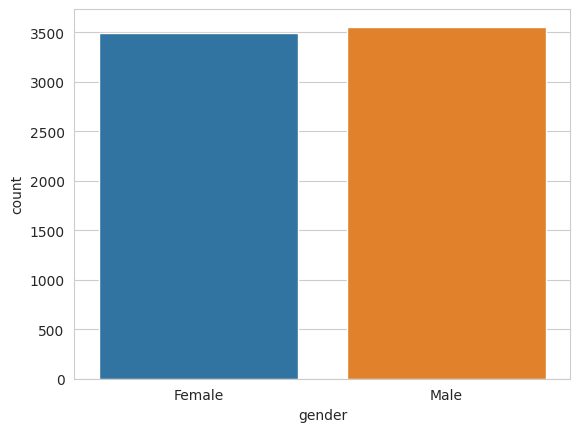

In [10]:
sns.set_style('whitegrid')
sns.countplot(x ='gender', data = customer_churn_data)

## Checking the Contract: Types of Contracts with Counts

In [11]:
customer_churn_data["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot: xlabel='Contract', ylabel='count'>

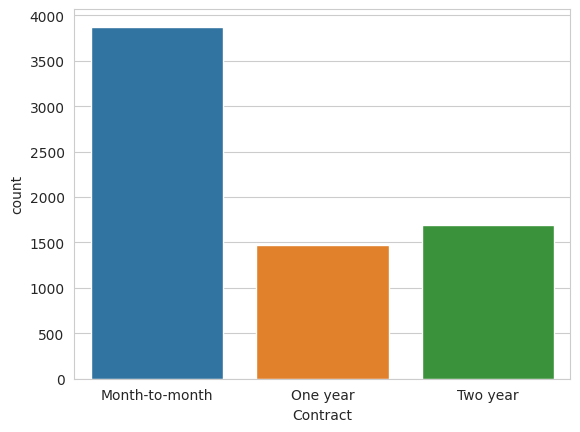

In [12]:
sns.set_style('whitegrid')
sns.countplot(x ='Contract', data = customer_churn_data)

## Checking Payment Methods: Types & Counts

In [13]:
customer_churn_data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

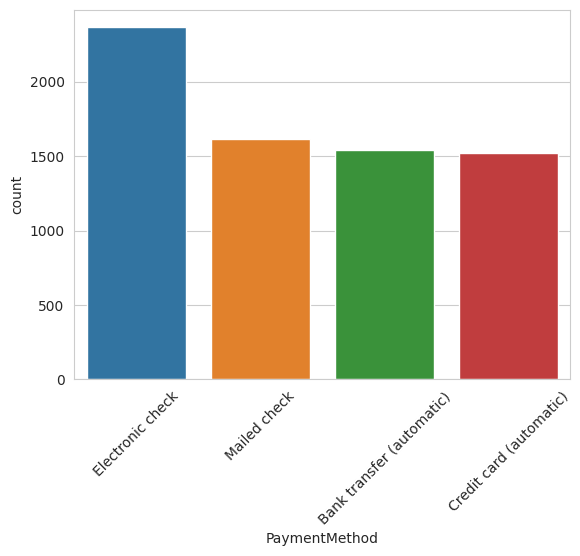

In [14]:
sns.set_style('whitegrid')
sns.countplot(x ='PaymentMethod', data = customer_churn_data)
plt.xticks(rotation=45)

## Checking the Churn Counts

In [15]:
customer_churn_data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot: xlabel='Churn', ylabel='count'>

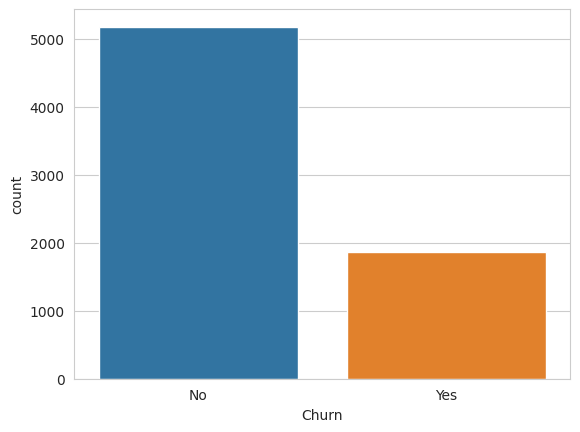

In [16]:
sns.set_style('whitegrid')
sns.countplot(x ='Churn', data = customer_churn_data)

## Checking for the Relationship between the Total Charges & Churn ( if the Charges has to do anything with Churn or not)

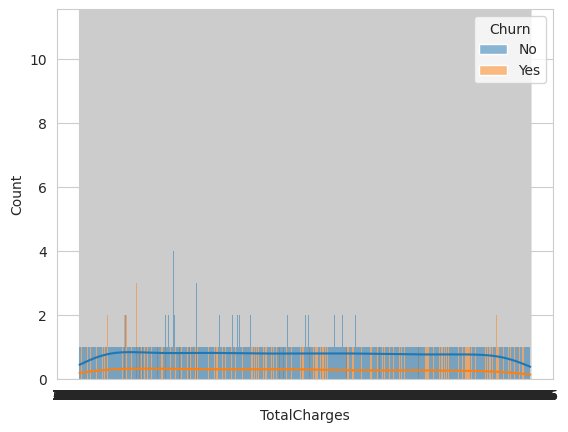

In [17]:
sns.histplot(data=customer_churn_data, x='TotalCharges', hue='Churn', kde=True)
plt.show()

## Checking for the Relationship between the Total Charges & Gender 
(Charges are based on Services/Contract so checking if male uses the most services or female)

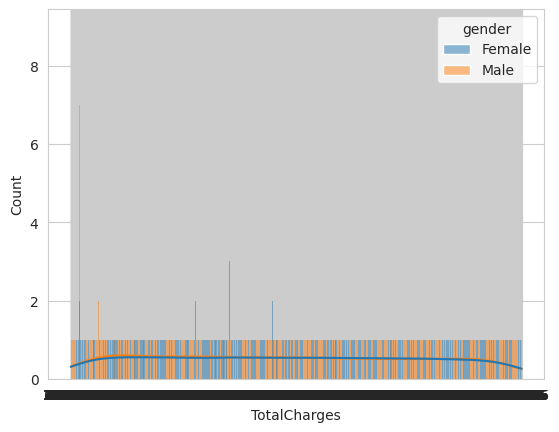

In [18]:
sns.histplot(data=customer_churn_data, x='TotalCharges', hue='gender', kde=True)
plt.show()

## Convering Yes & No to 1 & 0 ( for Machine Learning)

**'Yes': 1, 'No': 0**

In [19]:
customer_churn_data['Churn'] = customer_churn_data['Churn'].map({'Yes': 1, 'No': 0})

In [20]:
customer_churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Droping the Columns

In [21]:
customer_churn_data_updated = customer_churn_data.drop(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], axis=1)


### Updated Dataset

In [22]:
customer_churn_data_updated.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.5,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


## Identify and handle outliers

In [23]:
# Identify and handle outliers
# For example, we can use the Interquartile Range (IQR) method to remove outliers
Q1 = customer_churn_data_updated.quantile(0.25)
Q3 = customer_churn_data_updated.quantile(0.75)
IQR = Q3 - Q1
df = customer_churn_data_updated[~((customer_churn_data_updated < (Q1 - 1.5 * IQR)) | (customer_churn_data_updated > (Q3 + 1.5 * IQR))).any(axis=1)]

/tmp/ipykernel_20/2338571395.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = customer_churn_data_updated.quantile(0.25)
/tmp/ipykernel_20/2338571395.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = customer_churn_data_updated.quantile(0.75)
/tmp/ipykernel_20/2338571395.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = customer_churn_data_updated[~((customer_churn_data_updated < (Q1 - 1.5 * IQR)) | (customer_churn_data_updated > (Q3 + 1.5 * IQR))

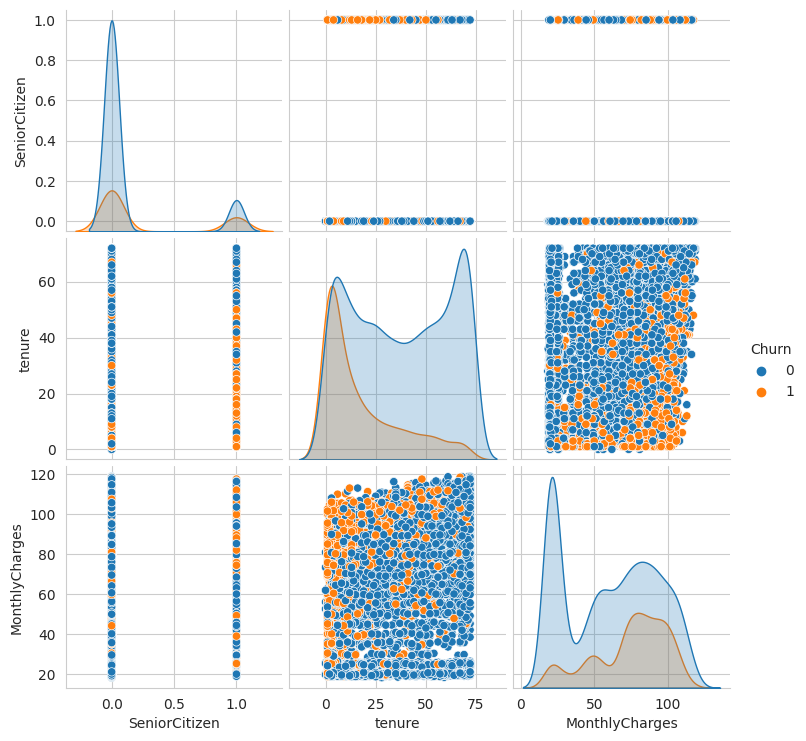

In [24]:
sns.pairplot(customer_churn_data_updated, hue='Churn')
plt.show()

In [25]:
customer_churn_data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   object 
 4   Churn           7043 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 275.2+ KB


## Converting TotalCharges to a float data type

In [26]:

customer_churn_data_updated['TotalCharges'] = pd.to_numeric(customer_churn_data_updated['TotalCharges'], errors='coerce')

# Print the data types of the columns
print(customer_churn_data_updated.dtypes)

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
Churn               int64
dtype: object


## Checking for Null Values

In [27]:
customer_churn_data_updated.isnull().sum()

SeniorCitizen      0
tenure             0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64

In [28]:
customer_churn_data_updated.shape

(7043, 5)

In [29]:
customer_churn_data_updated.dropna(inplace=True)

In [30]:
customer_churn_data_updated.shape

(7032, 5)

# Machine Learning we'll be (Spliting, Training & Evaluating) our Data

### Classification Models:
1. LogisticRegression
2. DecisionTreeClassifier
3. RandomForestClassifier

In [31]:
# Split the data into training and testing sets
X = customer_churn_data_updated.drop('Churn', axis=1)
y = customer_churn_data_updated['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train and evaluate multiple classification algorithms

print("---------------------------------------")
print("-------- LogisticRegression ----------")
print("---------------------------------------")

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print("Precision:", precision_score(y_test, lr_y_pred))
print("Recall:", recall_score(y_test, lr_y_pred))
print("F1 score:", f1_score(y_test, lr_y_pred))

print("---------------------------------------")
print("-------- DecisionTreeClassifier ----------")
print("---------------------------------------")

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Precision:", precision_score(y_test, dt_y_pred))
print("Recall:", recall_score(y_test, dt_y_pred))
print("F1 score:", f1_score(y_test, dt_y_pred))


print("---------------------------------------")
print("-------- RandomForestClassifier ----------")
print("---------------------------------------")

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Precision:", precision_score(y_test, rf_y_pred))
print("Recall:", recall_score(y_test, rf_y_pred))
print("F1 score:", f1_score(y_test, rf_y_pred))

---------------------------------------
-------- LogisticRegression ----------
---------------------------------------
Logistic Regression
Accuracy: 0.7853589196872779
Precision: 0.624031007751938
Recall: 0.43989071038251365
F1 score: 0.516025641025641
---------------------------------------
-------- DecisionTreeClassifier ----------
---------------------------------------
Decision Tree
Accuracy: 0.7256574271499645
Precision: 0.4732620320855615
Recall: 0.48360655737704916
F1 score: 0.4783783783783784
---------------------------------------
-------- RandomForestClassifier ----------
---------------------------------------
Random Forest
Accuracy: 0.7704335465529495
Precision: 0.5723905723905723
Recall: 0.4644808743169399
F1 score: 0.5128205128205129


## Model Evaluation and Fine-tuning

In [32]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6]
}

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(rf, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and its accuracy score
print("Best parameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_split': 6, 'n_estimators': 100}
Accuracy score: 0.7882666666666667


# END